<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/T_M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Galerkin**

Este es un tipo de método de residuos pesados, donde las funciones de peso

coinciden con las funciones base$$\beta_i$$


El método de Galerkin es un método de aproximación para resolver ecuaciones diferenciales mediante la proyección de la solución en un subespacio de dimensión finita.

La solución se aproxima como
$$
u_N(x)=\sum_{i=1}^{N} a_i\,\beta_i(x),
$$
donde las funciones base $\beta_i(x)$ satisfacen las condiciones de frontera.

Al sustituir $u_N$ en la ecuación diferencial se obtiene el residuo
$$
R(x)=L(u_N)-f,
$$
y el método impone que dicho residuo sea ortogonal a cada función base:
$$
\int R(x)\,\beta_j(x)\,dx=0,
\qquad j=1,\ldots,N.
$$

Esto conduce a un sistema algebraico para los coeficientes $a_i$, cuya solución define la
aproximación final $u_N(x)$.


**Para ejemplificar dicho método, se resolverá el siguiente ejercicio:

5.12 Se desea encontrar una solución aproximada de**

$$
- u'' + u - x = 0
$$

con condiciones de frontera

$$
u(0) = u(1) = 0
$$

utilizando el método de Galerkin.

Use

$$
u_3(x) = \sum_{i=1}^{3} \alpha_i \, \beta_i(x)
$$

con

$$
\beta_i(x) = \sin(i\pi x)
$$

para encontrar las constantes apropiadas $\alpha_i$.

In [16]:
import sympy as sp##Álgebra simbólica: derivadas, integrales, ecuaciones, expresiones exactas
import numpy as np ## Cálculo numérico
import matplotlib.pyplot as plt #Gráficas: visualización de datos


Para Obtener Solución Analítica:

In [17]:
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [18]:
ode = u(x).diff(x, x) - u(x) + x #
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [19]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

In [20]:
sol #Presenta la solución analítica del problema planteado

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [21]:
# Variable simbólica y función desconocida
x = sp.symbols('x', real=True)
u = sp.Function('u')

# EDO del problema:
# -u'' + u - x = 0  <=>  u'' - u + x = 0
ode = sp.Eq(sp.diff(u(x), x, 2) - u(x) + x, 0)

# Condiciones de frontera
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
u_expr = sp.simplify(sol.rhs)

print("Solución analítica u(x) =")
sp.pprint(u_expr)


Solución analítica u(x) =
⎛  ⎛     2⎞  x    2⋅x + 1    ⎞  -x
⎝x⋅⎝1 - ℯ ⎠⋅ℯ  + ℯ        - ℯ⎠⋅ℯ  
──────────────────────────────────
                   2              
              1 - ℯ               


### Solución analítica final:

$$
\boxed{
u(x) = x - \frac{\sinh(x)}{\sinh(1)}
}
$$

$$
\text{(Equivalente: } \;
u(x) = x + \frac{e^{-x} - e^{x}}{e - e^{-1}}
\text{)}
$$

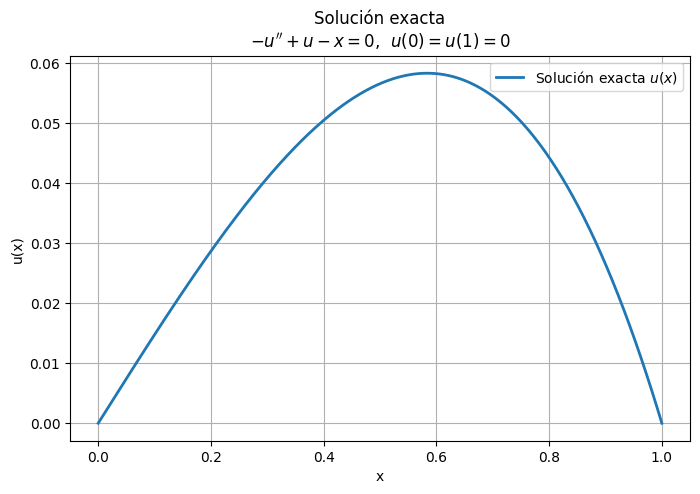

In [22]:
# Convertimos a función numérica
u_num = sp.lambdify(x, u_expr, "numpy")

xx = np.linspace(0, 1, 400)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución exacta $u(x)$", linewidth=2)
plt.title("Solución exacta\n$-u'' + u - x = 0$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()


$$
\textbf{ Aproximación Galerkin con }
\beta_i(x) = \sin(i\pi x), \; N = 3
$$

In [23]:
# Los Coeficientes a1, a2, a3
a1, a2, a3 = sp.symbols('a1 a2 a3')

# Se palntean las Funciones base
beta1 = sp.sin(sp.pi*x)
beta2 = sp.sin(2*sp.pi*x)
beta3 = sp.sin(3*sp.pi*x)

# Para la aproximación u3(x) = sum_{i=1}^3 a_i beta_i(x)
u_3 = a1*beta1 + a2*beta2 + a3*beta3
u_3


a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

$$
\textbf{Residuo } R(x) = u_3'' - u_3 + x
$$

In [24]:
u_3_d2 = sp.diff(u_3, x, 2)

# Residuo del operador: u'' - u + x = 0
R = u_3_d2 - u_3 + x
sp.simplify(R)


-a1*sin(pi*x) - a2*sin(2*pi*x) - a3*sin(3*pi*x) + x - pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

$$
\textbf{Condiciones de Galerkin: }
\int R(x)\,\beta_j(x)\,dx = 0
$$

In [25]:
# Condiciones Galerkin: <R, beta_j> = 0 para j=1,2,3
I1 = sp.integrate(R*beta1, (x, 0, 1))
I2 = sp.integrate(R*beta2, (x, 0, 1))
I3 = sp.integrate(R*beta3, (x, 0, 1))

I1_s = sp.simplify(I1)
I2_s = sp.simplify(I2)
I3_s = sp.simplify(I3)

I1_s, I2_s, I3_s


((-pi**3*a1 - pi*a1 + 2)/(2*pi),
 (pi*a2*(-4*pi**2 - 1) - 1)/(2*pi),
 (-27*pi**3*a3 - 3*pi*a3 + 2)/(6*pi))

$$
\textbf{Resuelve sistema para } \alpha_1, \alpha_2, \alpha_3:
$$

In [26]:
sol_a = sp.solve([sp.Eq(I1_s, 0), sp.Eq(I2_s, 0), sp.Eq(I3_s, 0)], [a1, a2, a3], simplify=True)
sol_a


{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}

$$
\textbf{Se construye } u_3(x) \textbf{ final y función numérica}
$$

In [27]:
u_approx = sp.simplify(u_3.subs(sol_a)) #Para obtener la solución aproximada
print("u_3(x) aproximada =")
sp.pprint(u_approx)

u_approx_fn = sp.lambdify(x, u_approx, "numpy")


u_3(x) aproximada =
2⋅sin(π⋅x)   sin(2⋅π⋅x)   2⋅sin(3⋅π⋅x)
────────── - ────────── + ────────────
       3             3              3 
  π + π       π + 4⋅π     3⋅π + 27⋅π  



$$\textbf{ Comparar gráficas: analítica vs numérica (Galerkin)}$$

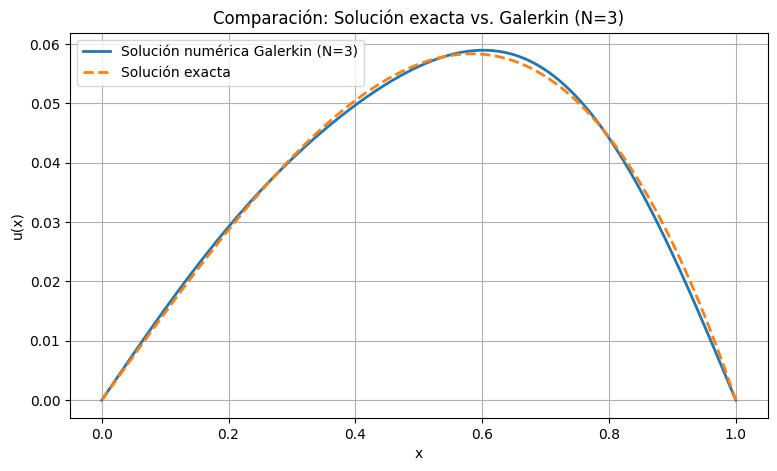

In [28]:
xx = np.linspace(0, 1, 600)
u_exact_vals = u_num(xx)
u_gal_vals = u_approx_fn(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, u_gal_vals, label="Solución numérica Galerkin (N=3)", linewidth=2)
plt.plot(xx, u_exact_vals, "--", label="Solución exacta", linewidth=2)

plt.title("Comparación: Solución exacta vs. Galerkin (N=3)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()


## Error de la aproximación
Calculamos el error:
- Norma infinito  $$\|e\|_{\infty}=\max_{x\in[0,1]}|u(x)-u_3(x)|$$
- Norma $L^2$ aproximada por cuadratura compuesta (trapecios).


Errores de la aproximación Galerkin (N=3):
||e||_inf  = 1.982548e-03
||e||_L2   ≈ 8.441839e-04


/tmp/ipython-input-1985386835.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  err_L2 = np.sqrt(np.trapz(e**2, xx))  # aproximación por trapecios


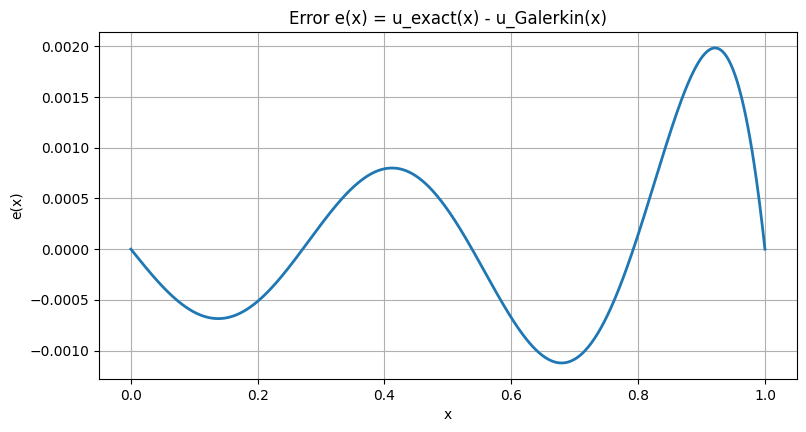

In [29]:
e = u_exact_vals - u_gal_vals

err_inf = np.max(np.abs(e))
err_L2 = np.sqrt(np.trapz(e**2, xx))  # aproximación por trapecios

print("Errores de la aproximación Galerkin (N=3):")
print(f"||e||_inf  = {err_inf:.6e}")
print(f"||e||_L2   ≈ {err_L2:.6e}")

plt.figure(figsize=(9,4.5))
plt.plot(xx, e, linewidth=2)
plt.title("Error e(x) = u_exact(x) - u_Galerkin(x)")
plt.xlabel("x")
plt.ylabel("e(x)")
plt.grid(True)
plt.show()


## Conclusiones
- El método de Galerkin convierte la EDO en un sistema lineal para los coeficientes $a_i$.
- Con bases senoidales que satisfacen automáticamente $u(0)=u(1)=0$, la matriz es diagonal por ortogonalidad.
- La aproximación $u_3$ reproduce bien la forma de la solución y el error disminuye al aumentar el número de términos.